In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Loading

#### survival	-- Survival	0 = No, 1 = Yes
#### pclass	-- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#### sex	-- Sex	
#### Age	-- Age in years	
#### sibsp	-- # of siblings / spouses aboard the Titanic	
#### parch	-- # of parents / children aboard the Titanic	
#### ticket	-- Ticket number	
#### fare	-- Passenger fare	
#### cabin	-- Cabin number	
#### embarked	-- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

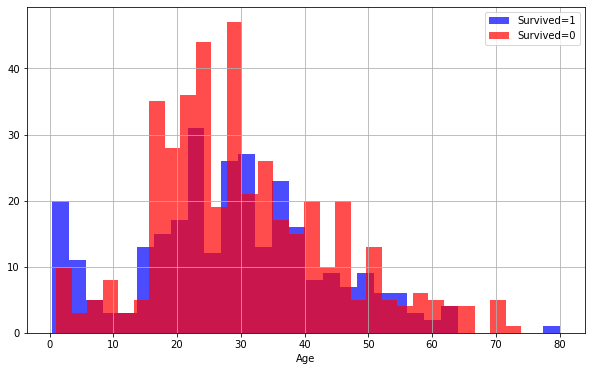

In [6]:
plt.figure(figsize=(10,6))

data[data['Survived'] == 1]['Age'].hist(alpha=0.7, color='blue', bins=30, label='Survived=1');
data[data['Survived'] == 0]['Age'].hist(alpha=0.7, color='red', bins=30, label='Survived=0');
plt.legend();
plt.xlabel('Age');

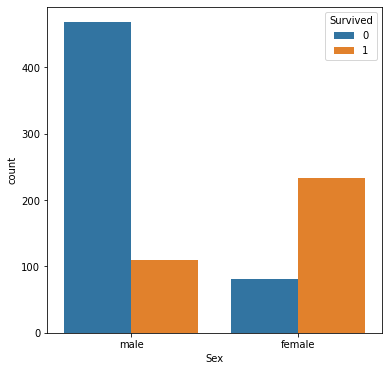

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', hue='Survived', data=data);

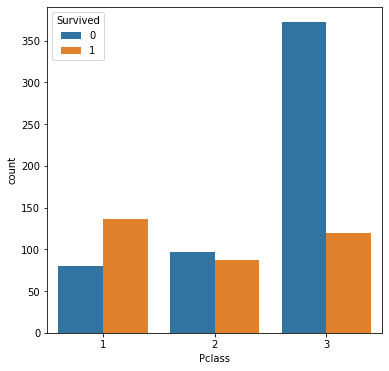

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass', hue='Survived', data=data);

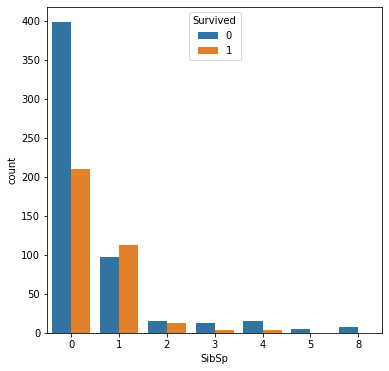

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='SibSp', hue='Survived', data=data);

## Data Preprocessing

In [11]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [12]:
data = data.dropna()

In [13]:
y = data['Survived']
data = data.drop(columns='Survived')

### One-Hot Encoding

In [14]:
X = pd.get_dummies(data, drop_first=True)

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Fare        712 non-null    float64
 5   Sex_male    712 non-null    uint8  
 6   Embarked_Q  712 non-null    uint8  
 7   Embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 35.5 KB


### Splitting Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

## Modeling
### Decision Tree Model / Random Forest

In [21]:
tree = DecisionTreeClassifier()
rf =RandomForestClassifier(n_estimators=600)

### Training Model

In [25]:
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predicting Data

In [26]:
predict_tree = tree.predict(X_test)
predict_rf = rf.predict(X_test)

## Evaluating Model

### Decision Tree

In [28]:
print(classification_report(y_test, predict_tree))
print(confusion_matrix(y_test, predict_tree))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       127
           1       0.73      0.71      0.72        87

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.77      0.78      0.78       214

[[104  23]
 [ 25  62]]


### Random Forest

In [31]:
print(classification_report(y_test, predict_rf))
print(confusion_matrix(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.77      0.68      0.72        87

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214

[[109  18]
 [ 28  59]]
